### MY470 Computer Programming

### Final Assignment, MT 2018

#### \*\*\* Due 12:00 noon on Monday, January 14 \*\*\*

---
### What is the characteristic time-scale of interactions between editors on Wikipedia?

The final assignment asks you to use the computational thinking and programming skills you learned in the course to answer an empirical social science question. You are expected to apply the best practices and theoretical concepts we covered in the course to produce a program that not only produces the correct output but is also legible, modular, and reasonably optimized. The assignment assumes mastery of loops, conditionals, and functions, as well as basic awareness of issues related to runtime performance.

In the assignment, we will study reverts on Wikipedia. A revert occurs when an editor undoes the changes made by another editor. We will first identify who reverted whom and when, then differentiate between bots, vandals, and human editors, and finally compare the typical time between reverts for bot-bot and human-human reverts.


#### Hints

Some of the hints below point to one possible way of solving the problems but this is not necessarily the best one. The hints are not intended to stifle your creativity and ingenuity. Alternative approaches will be appreciated, as long as they are not more convoluted or slower.

Although this assignment is quite streamlined, imagine that the tasks here are part of a larger project. How would you structure your program if in the future you may need to use a different dataset, manipulate the data differently, add additional analyses, or modify the focus of the current analysis? For example, consider placing helping functions in a separate file called `utils.py` or `tools.py`. These would be functions that you may need in different contexts and for different tasks. 

### Data

We will use data from the file `rowiki_2006.txt`. 
To data were originally obtained from the Wikipedia XML Dumps (https://dumps.wikimedia.org/mirrors.html) and include every article edit made on Romanian Wikipedia since it began until the end of 2006. Each line in the file is an edit and includes the title of the edited article, the time when the edit was submitted, whether the edit was a revert, the version of the article, and the user who submitted the edit. To detect the article versions, a hash was calculated for the complete article text following each revision and the hashes were compared between edits. 

The table below describes the variables in the data:

| Variable   | Explanation   
|:-----------|:-------
| title      | title of the edited article               
| time       | time in the format YYYY-MM-DD HH:MM:SS when the edit was completed  
| revert     | 1 if the edit was detected to revert to a previous article version, 0 otherwise 
| version    | an integer indicating a unique state of the article, generally increasing over time; -1 indicates the article was empty (usually due to vandalism); if the same number appears more than once, then the article was exactly in the same state at these different time points  
| user       | the editor's username or if not logged in, the editor's IP address  


### 1. Who reverted whom?

Your goal is to create a network, where an edge goes from the editor who restored an earlier version of the article (the "reverter") to the editor who made the revision immediately after that version (the "reverted"). For every edge, you should know who was the reverter, who got reverted, and when the revert occured.

In addition, you will need to clean up the self-reverts – we will not use them in the analyses here.

Save the network data in a `pickle` file, which you will need for the next task.

Print the number of nodes and number of edges (reverts) in the network.

#### Hints

Refer to the lab slides from Week 11 to find out about peculiarities in the data and useful modules that you should take into consideration.

There are multiple ways to save the network data. For example, you could use the `networkx` module or create your own network class but you are not expected to. For our purposes here, it will be sufficient to use a single list, or multiple lists, or a list and dictionary, or just dictionaries. You should consider how you are going to use the data to decide on a reasonable data structure.

Keep different data manipulations in separate functions. 

Keep this code in a separate `.py` file and then import the functions in the code cell below to create and pickle the data. You will need to run the code only once as later you will use the pickled data directly and not need to do the data processing again and again. In addition, make sure your `.py` file has a proper `main()` function to allow to run it from the Terminal directly, not just from this notebook. 


In [1]:
import Question_1

data = Question_1.get_data('rowiki_2006.txt')

Question_1.create_network(data)

'The number of nodes is: 4805 and the number of edges is: 7364'

### 2. Vandals, human editors, and bots

Your goal is to classify each node in the revert network as either vandal (an editor who edits Wikipedia with the purpose of causing damage rather than contributing), human editor, or bot. 

* To identify bots, use the file `botlist_final.txt`, which contains the names of all bots we identified on a number of different language versions of Wikipedia, including Romanian Wikipedia.
* We will assume that a vandal is an editor with all of their edits reverted. This is simply a heuristic. (In fact, it is a conservative assumption since we will most likely also label as vandals well-meaning newbies who give up on editing Wikipedia because their first edits get reverted.)
* Any editor who is not a bot or a vandal, we will label a human editor.

Save this information in the previous or a new `pickle` file, as you will need it for the next task.

Print the number of vandals, number of human editos, and number of bots.

#### Hints

Keep this code in a separate `.py` file and then import the functions in the code cell below to create and pickle the data. You will need to run the code only once as later you will use the pickled data directly and not need to do the data processing again and again. In addition, make sure your `.py` file has a proper `main()` function to allow to run it from the Terminal directly, not just from this notebook. 

In [2]:
import networkx as nx
wiki_network = nx.read_gpickle('wiki_network')

import Question_2

Question_2.classification(wiki_network, data, 'botlist_final.txt')

"Counter({'vandal': 2689, 'human': 2096, 'bot': 20})"

### 3. Time between reverts for human-human and bot-bot interactions

You are asked to plot the distribution of times between successive reverts for bot-bot interactions and for human-human interactions. In essence, you need to plot two overlapping histograms that show the proportion of succesive reverts between two editors $i$ and $j$ (regardless of whether $(i \rightarrow j, j \rightarrow i)$  or $(i \rightarrow j, i \rightarrow j)$) that occured within a certain time interval. One of the histograms will be for cases when both $i$ and $j$ are bots, and the other – for cases when both $i$ and $j$ are human editors. You should measure the time intervals in $log_{10}$ seconds.
  
#### Hints

As before, consider whether to keep this code in one or more separate `.py` files. Then simply import the functions in the code cell below to do the analysis and print and plot the results. 


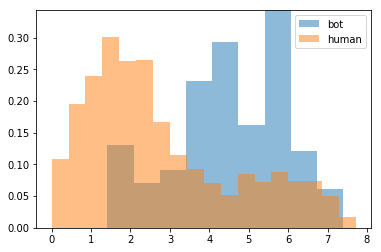

In [5]:
import networkx as nx
wiki_network = nx.read_gpickle('wiki_network')

import Question_3

bot_timedelta = Question_3.interaction_time(wiki_network, 'bot')
human_timedelta = Question_3.interaction_time(wiki_network, 'human')
Question_3.overlapping_histogram(bot_timedelta, human_timedelta, 'bot', 'human')

---

### Evaluation

| Aspect | Mark     | Comment   
|:-------:|:--------:|:----------------------
| Code runs      |   /40    |              
| Accuracy       |   /10    | 
| Legibility     |   /10    | 
| Modularity     |   /10    | 
| Order-of-growth optimization      |   /20    | 
| Additional runtime optimization   |   /10    | 
|**Total**|**/100**  | 
